In [75]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv( 'hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
# пересчитываем рост в см, вес - в кг
data['height'] = data['height_inches'] * 2.54
data['weight'] = data['weight_pounds'] * 0.54
data.head()

,index,height_inches,weight_pounds,height,weight
0,1,65.78331,112.9925,167.089607,61.015950
1,2,71.51521,136.4873,181.648633,73.703142
2,3,69.39874,153.0269,176.272800,82.634526
3,4,68.21660,142.3354,173.270164,76.861116
4,5,67.78781,144.2971,172.181037,77.920434


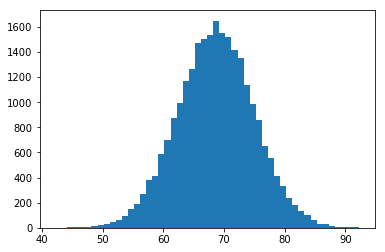

In [76]:
plt.hist( data['weight'], bins = 50 )
plt.show()

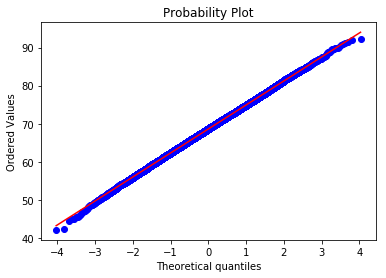

In [77]:
# проверим "нормальность"  распределения с помощью QQ-plot

stats.probplot( data['weight'], dist="norm", plot=plt )
plt.show()

In [139]:
# делаем подвыборку из генеральной совокупности, состоящую из 20 человек с ростом от 170 до 180 см
# и выдвигаем гипотезу H0 о том, что между новой выборкой и генеральной совокупностью нет значимых различий
# гипотеза H1, альтернативная - между новой выборкой и генеральной совокупностью есть значимые различия
# уровень значимости alpha = 0,05

morethan170 = data['height'] > 170
lessthan180 = data['height'] < 180
dataSelected1 = data[morethan170 & lessthan180]
dataSelected1.reset_index(inplace=True)
del dataSelected1['level_0']
pd.DataFrame.reset_index
del dataSelected1['index']
dataSelected = dataSelected1.loc[:19]
dataSelected


,height_inches,weight_pounds,height,weight
0,69.39874,153.0269,176.272800,82.634526
1,68.21660,142.3354,173.270164,76.861116
2,67.78781,144.2971,172.181037,77.920434
3,68.69784,123.3024,174.492514,66.583296
4,69.80204,141.4947,177.297182,76.407138
5,70.01472,136.4623,177.837389,73.689642
6,67.90265,112.3723,172.472731,60.681042
7,67.62333,114.1430,171.763258,61.637220
8,68.30248,125.6107,173.488299,67.829778
9,67.11656,122.4618,170.476062,66.129372


In [140]:
# считаем средние для генеральной совокупности и подвыборки 
data['weight'].mean()

68.62288742683216

In [141]:
dataSelected['weight'].mean()

71.7790194

In [142]:
# используем одновыборочный критерий, так как мы сравниваем одну подвыборку с генерально совокупностью
stats.ttest_1samp( dataSelected['weight'], data['weight'].mean())

Ttest_1sampResult(statistic=2.2438433326708793, pvalue=0.036952752151289438)

In [143]:
# поскольку р < 0,05, значение рассчитанного t-критерия превышает табличное для df=19,
# (расчитано для двух зависимых выборок), Н0 отвергается, принимается Н1, различия статистически значимы